In [ ]:
# svd_utils.py의 get_available_memory 함수를 변경해야 작동
import ffta

c:\test_pycroscopy\ffta\ffta\pixel_utils\parab.py:8: UserWarning: cuPy not installed; no GPU available
  warnings.warn('cuPy not installed; no GPU available')


In [2]:
import pyUSID as usid
import numpy as np
from matplotlib import pyplot as plt

In [36]:
ibw_folder = 'perovskite'
topo_path = 'perovskite_example.ibw'

h5_path, param_dict, h5_avg = ffta.load.load_hdf.load_wrapper(ibw_file_path=topo_path, ff_file_path=ibw_folder)

c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\sidpy\sid\translator.py:42: FutureWarning: Consider using sidpy.Reader instead of sidpy.Translator if possible and contribute your reader to ScopeReaders
  warn('Consider using sidpy.Reader instead of sidpy.Translator if '
c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\pyUSID\io\hdf_utils\simple.py:1072: UserWarning: In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying
  warn('In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying')
c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\pyUSID\io\hdf_utils\simple.py:1129: UserWarning: pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer createsregion references for each dimension. Please use pyUSID.io.reg_ref.write_region_references to manually create region references
  warn('pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer cr

perovskite folder path
Loading first signal
#### FFtrEFM_0002.ibw ####
#### FFtrEFM_0003.ibw ####
#### FFtrEFM_0004.ibw ####
#### FFtrEFM_0005.ibw ####
#### FFtrEFM_0006.ibw ####
#### FFtrEFM_0007.ibw ####
#### FFtrEFM_0008.ibw ####
#### FFtrEFM_0009.ibw ####
#### FFtrEFM_0010.ibw ####
#### FFtrEFM_0011.ibw ####
#### FFtrEFM_0012.ibw ####
#### FFtrEFM_0013.ibw ####
#### FFtrEFM_0014.ibw ####
#### FFtrEFM_0015.ibw ####
#### FFtrEFM_0016.ibw ####
#### FFtrEFM_0017.ibw ####
#### FFtrEFM_0018.ibw ####
#### FFtrEFM_0019.ibw ####
#### FFtrEFM_0020.ibw ####
#### FFtrEFM_0021.ibw ####
#### FFtrEFM_0022.ibw ####
#### FFtrEFM_0023.ibw ####
#### FFtrEFM_0024.ibw ####
#### FFtrEFM_0025.ibw ####
#### FFtrEFM_0026.ibw ####
#### FFtrEFM_0027.ibw ####
#### FFtrEFM_0028.ibw ####
#### FFtrEFM_0029.ibw ####
#### FFtrEFM_0030.ibw ####
#### FFtrEFM_0031.ibw ####
*** Copy-Paste below code for IDE access to h5***
import h5py
h5_file = h5py.File(r'perovskite_example_00.h5')
h5_avg = h5_file['FF_Group/FF_Avg']

In [25]:
# 위 코드 실행시 perovskite_example.h5라는 파일 생성
import h5py
h5_file = h5py.File(r'perovskite_example.h5')

In [15]:
import sidpy

sidpy.hdf_utils.print_tree(h5_file)

/
├ FF_Group
  --------
  ├ FF_Avg
  ├ Position_Indices
  ├ Position_Values
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values
├ Position_Indices
├ Position_Values
├ Spectroscopic_Indices
├ Spectroscopic_Values
├ charging_000
  ------------
  ├ Position_Indices
  ├ Position_Values
  ├ Raw_Data
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values
├ height_000
  ----------
  ├ Position_Indices
  ├ Position_Values
  ├ Raw_Data
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values
├ shift_000
  ---------
  ├ Position_Indices
  ├ Position_Values
  ├ Raw_Data
  ├ Spectroscopic_Indices
  ├ Spectroscopic_Values


In [37]:
# 위에서 h5_avg와 동일
h5_file['FF_Group']['FF_Avg'].shape

(3840, 16000)

Consider calling test() to check results before calling compute() which computes on the entire dataset and writes results to the HDF5 file
Took 5.39 sec to compute randomized SVD
Need 1 components for 80%
Need 1 components for 90%
Need 2 components for 95%
Need 83 components for 99%


c:\test_pycroscopy\ffta\ffta\analysis\svd.py:179: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig_abun.tight_layout()


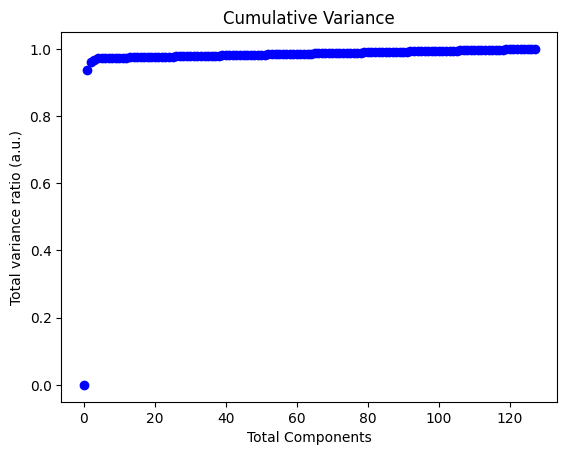

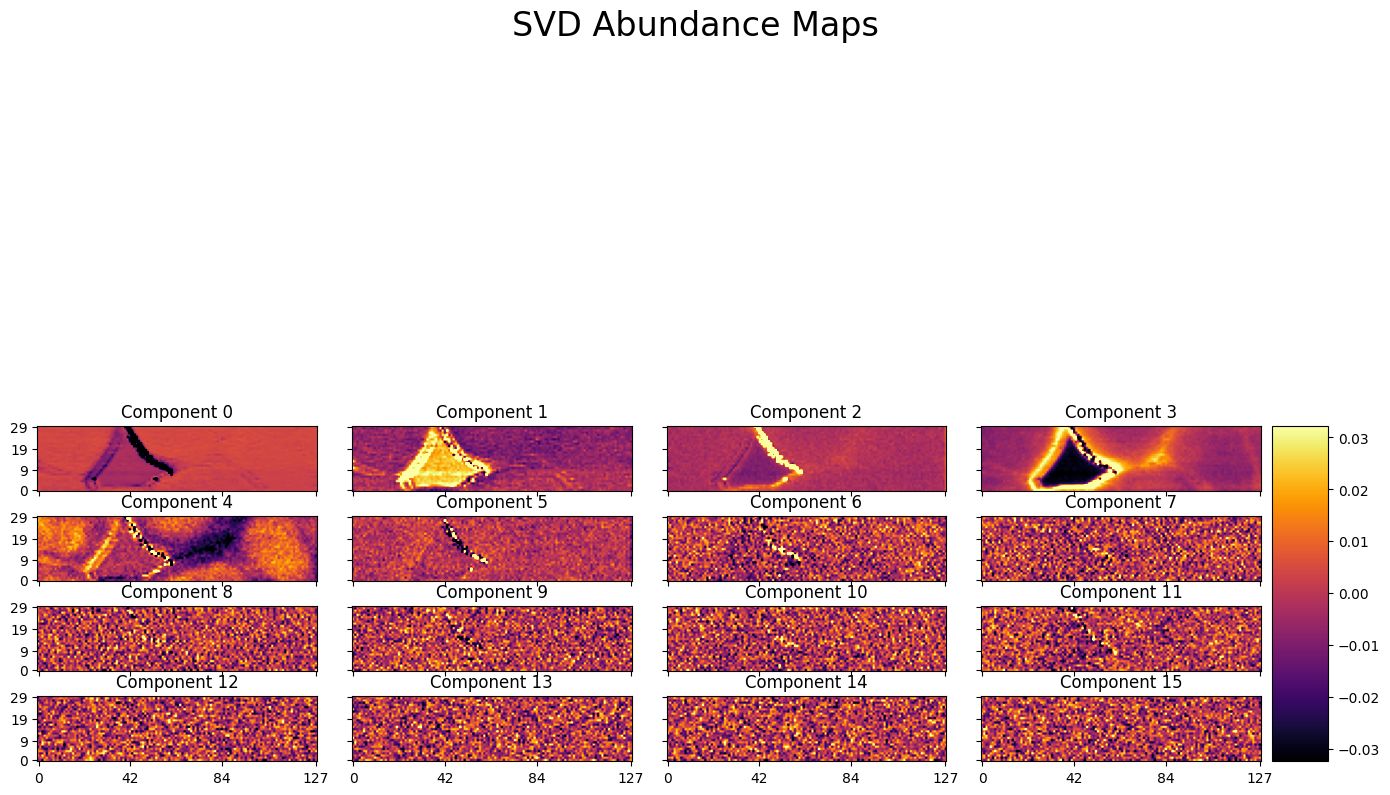

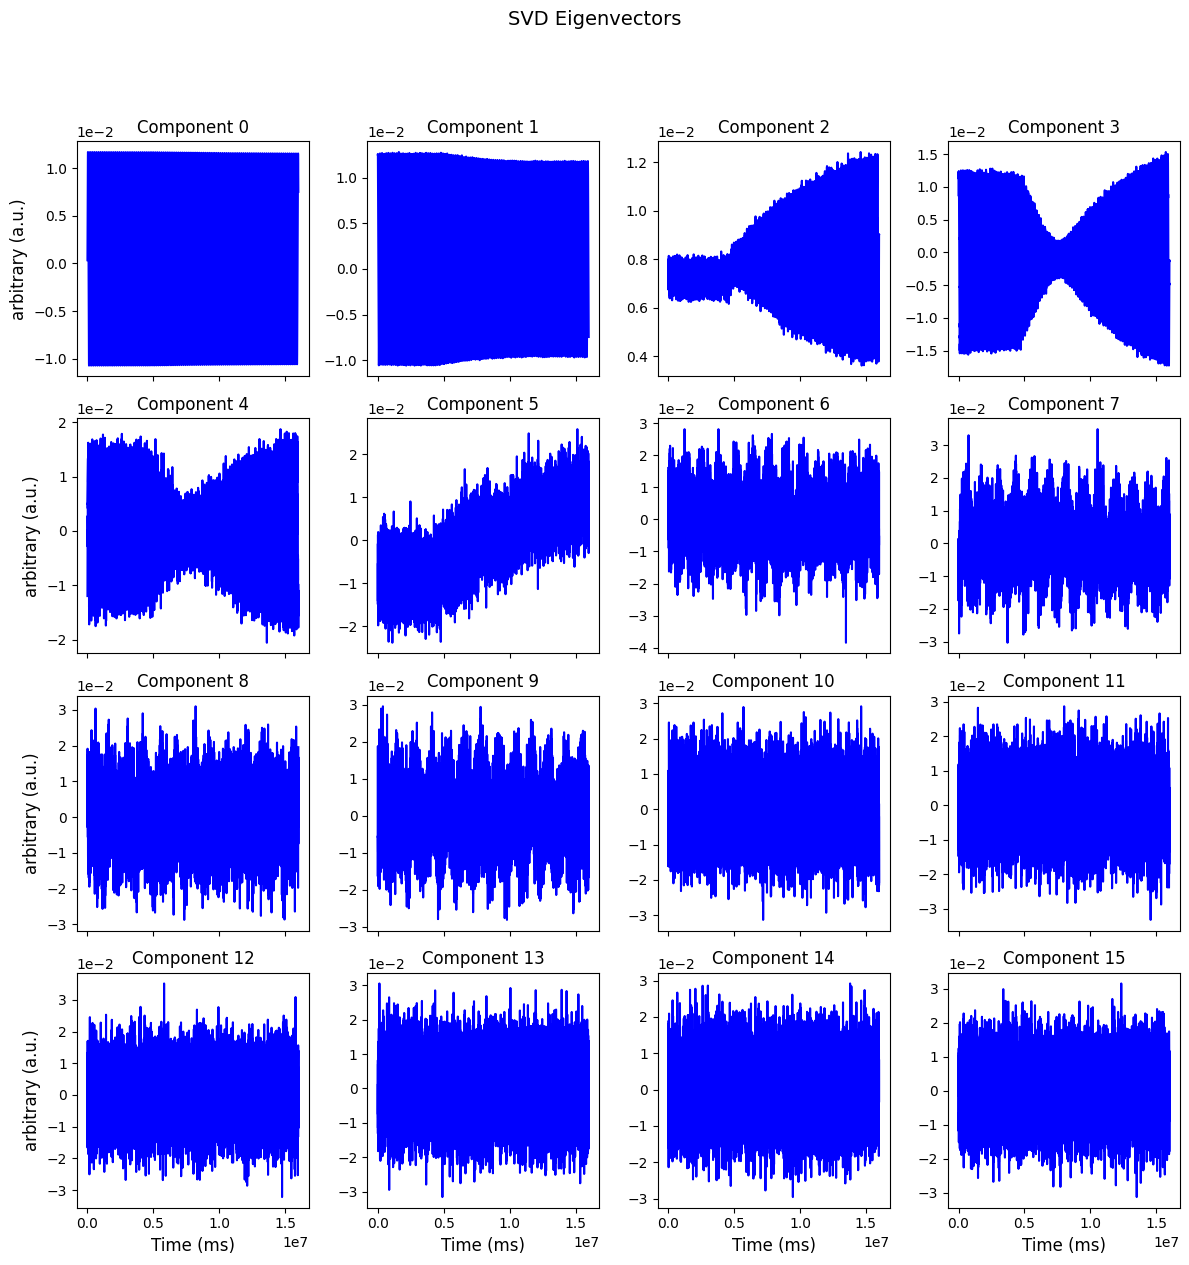

In [38]:
# SVD 적용
h5_svd = ffta.analysis.svd.test_svd(h5_avg, show_plots=True)

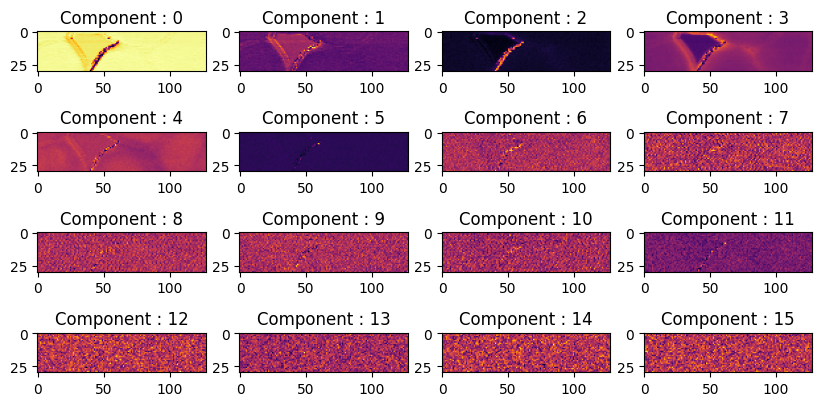

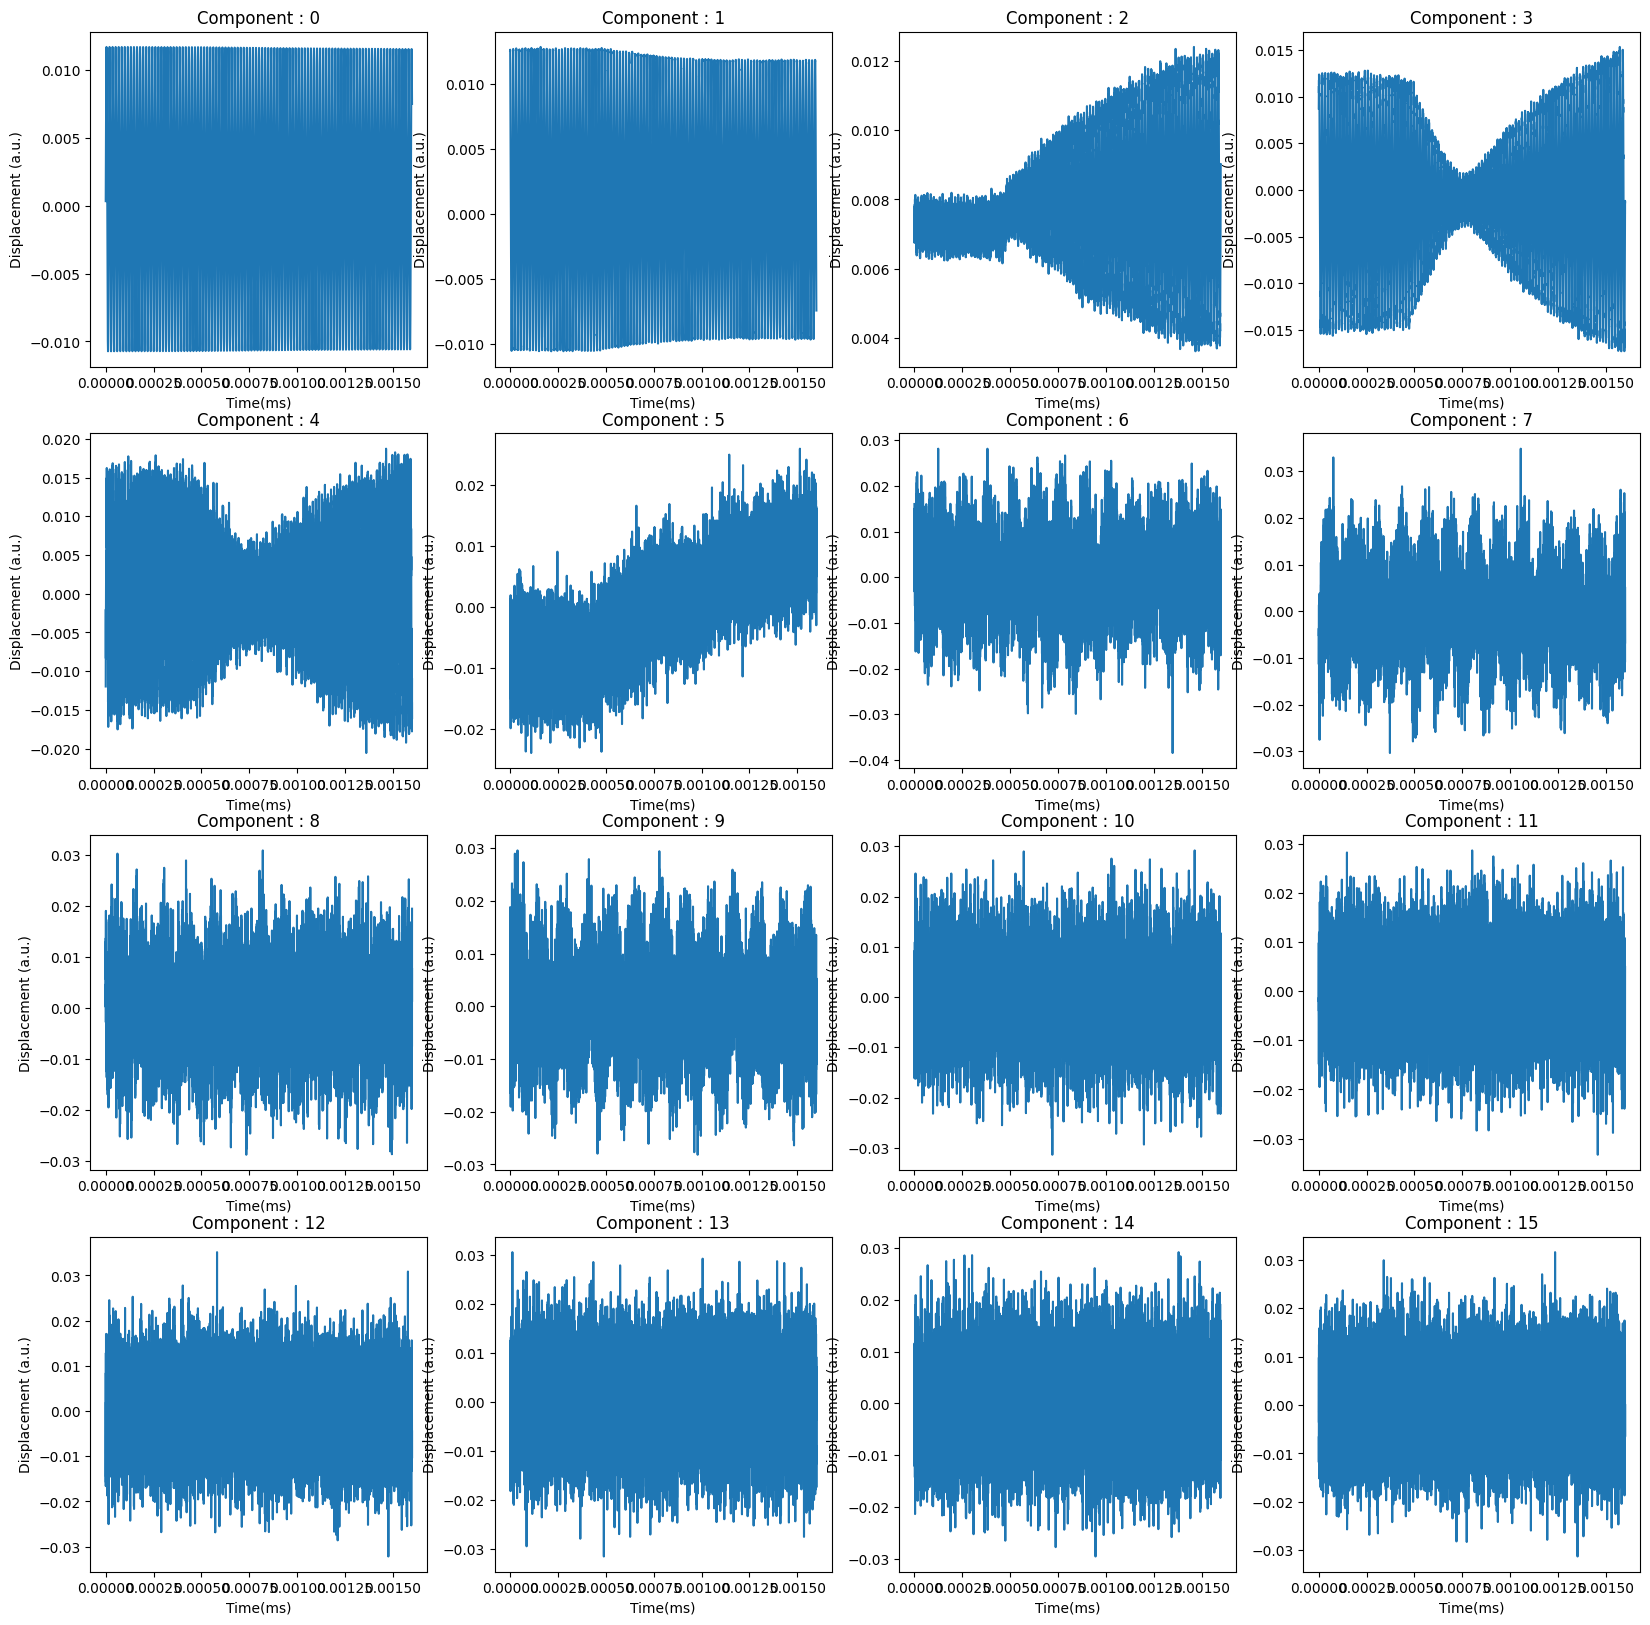

In [72]:
# U : (3840,128) / S : 128 / V : (128,16000)
U,V,S = h5_svd['U'],h5_svd['V'],h5_svd['S']
num_rows = param_dict['num_rows']

# row 30, col 128
n_rows = param_dict['num_rows']
n_cols = param_dict['num_cols']
# map : (30,128,25)
maps = np.reshape(U[:,:25], (n_rows, n_cols,-1))
eigen_vector = V[:16,:]

n_U_rows = 4
n_U_cols = 4

fig,axes1 = plt.subplots(nrows = n_U_rows, ncols= n_U_cols,figsize = (10,5))
fig,axes2 = plt.subplots(nrows = n_U_rows, ncols= n_U_cols,figsize = (20,20))

# tt : (25,30,128)
tt = np.transpose(maps,(2,0,1))
h5_spec_vals = h5_avg.get_spec_values('Time')

for i in range(n_U_rows):
    for j in range(n_U_cols):

        ax1 = axes1[i][j]
        ax1.imshow(tt[:][:][i*n_U_rows+j],cmap = 'inferno')
        ax1.set_title(f'Component : {str(i*4+j)}')

        ax2 = axes2[i][j]
        ax2.plot(h5_spec_vals,eigen_vector[i*n_U_rows+j])
        ax2.set_title(f"Component : {str(i*n_U_rows+j)}")
        ax2.set_xlabel('Time(ms)')
        ax2.set_ylabel("Displacement (a.u.)")

In [74]:
h5_avg

<HDF5 dataset "FF_Avg": shape (3840, 16000), type "<f4">
located at: 
	/FF_Group/FF_Avg 
Data contains: 
	Deflection (V) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 30 
	X - size: 128 
Spectroscopic Dimensions: 
	Time - size: 16000
Data Type:
	float32

In [ ]:
# 처음 6개의 component만 사용
clean_components = [i for i in range(6)]
h5_rb = ffta.analysis.svd.svd_filter(h5_avg,clean_components)

Reconstructing in batches of 2156 positions.
Batches should be 789.6001281738281 Mb each.
Completed reconstruction of data from SVD results.  Writing to file.
Done writing reconstructed data to file.


In [94]:
h5_rb

<HDF5 dataset "Rebuilt_Data": shape (3840, 16000), type "<f4">
located at: 
	/FF_Group/FF_Avg-SVD_000/Rebuilt_Data_000/Rebuilt_Data 
Data contains: 
	Deflection (V) 
Data dimensions and original shape: 
Position Dimensions: 
	Y - size: 30 
	X - size: 128 
Spectroscopic Dimensions: 
	Time - size: 16000
Data Type:
	float32

Consider calling test() to check results before calling compute() which computes on the entire dataset and writes results to the HDF5 file


[array([-6.90164538e+06, -6.90164538e+06, -6.90164538e+06, ...,
        -7.33468753e+01, -5.73743750e+01, -4.23235517e+01]),
 array([1.7840172e-08, 1.7840172e-08, 1.7840172e-08, ..., 2.7195563e-08,
        2.7161505e-08, 2.7130517e-08], dtype=float32),
 array([-1.63654065, -1.63654065, -1.63654065, ...,  1.58041443,
         1.58040308,  1.5804265 ]),
 0.0001228,
 -14.054596750615127,
 array([-1.06261466e-08, -1.06261466e-08, -1.06261466e-08, ...,
         6.72279987e-11,  6.71601612e-11,  6.70989063e-11])]

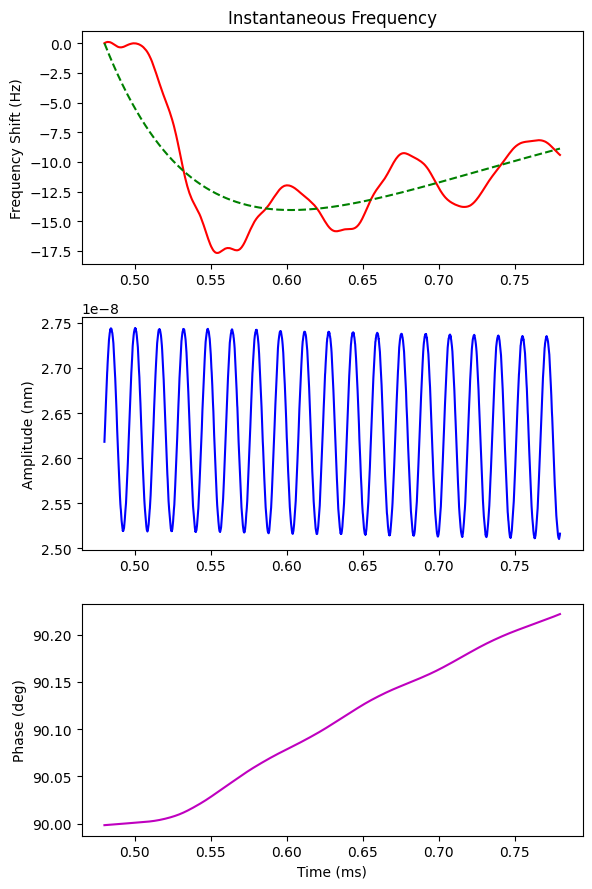

In [95]:
data = ffta.hdf_utils.process.FFtrEFM(h5_rb,override=False)
data.test(pixel_ind = [10,10])

[array([-6.89394013e+06, -6.89394013e+06, -6.89394013e+06, ...,
        -7.33107073e+01, -5.73409672e+01, -4.22999036e+01]),
 array([1.7829294e-08, 1.7829294e-08, 1.7829294e-08, ..., 2.7278846e-08,
        2.7244889e-08, 2.7210829e-08], dtype=float32),
 array([-1.63449672, -1.63449672, -1.63449672, ...,  1.58190959,
         1.58189827,  1.5819217 ]),
 0.000125,
 -16.465850319103115,
 array([-1.05804926e-08, -1.05804926e-08, -1.05804926e-08, ...,
         6.74328761e-11,  6.73653362e-11,  6.72965252e-11])]

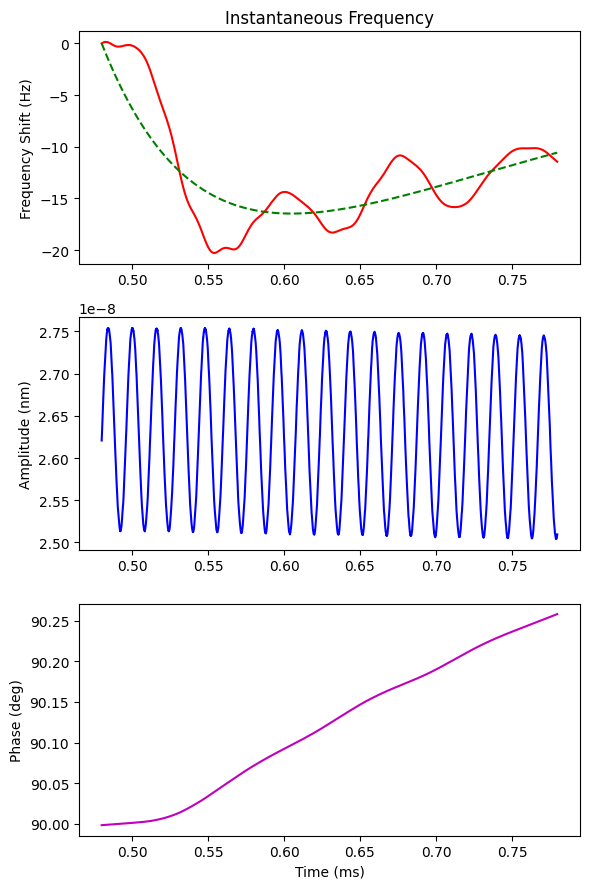

In [ ]:
# 원본 이미지는 30x128이므로 최대 29,127까지 가능
data.test(pixel_ind=[29,127])

In [114]:
data.parms_dict

{'FastScanSize': 1.2e-05,
 'SlowScanSize': 2.8125e-06,
 'bandpass_filter': 1,
 'drive_freq': 62751.0,
 'filter_bandwidth': 10000,
 'lift_height': 25.0,
 'machine_id': 'BOOK-GS3S7954PH',
 'n_pixels': 128,
 'n_taps': 999,
 'num_cols': 128,
 'num_rows': 30,
 'phase_fitting': 0,
 'platform': 'Windows-10-10.0.26100-SP0',
 'pnts_per_avg': 16000,
 'pnts_per_line': 128,
 'pnts_per_pixel': 1,
 'pts_per_pixel': 32,
 'pyUSID_version': '0.0.12',
 'quantity': 'Deflection',
 'recombination': 0,
 'roi': 0.0003,
 'sampling_rate': 10000000.0,
 'sidpy_version': '0.12.6',
 'timestamp': '2025_03_02-17_26_08',
 'total_time': 0.0016,
 'trigger': 0.00048,
 'units': 'V',
 'wavelet_analysis': 0,
 'wavelet_parameter': 0,
 'window': 'blackman',
 'if_only': False,
 'deconvolve': False}

In [ ]:
# data.update_parm(filter_amp=True,roi=0.0007,trigger=0.00052)

KeyError: 'method'

c:\test_pycroscopy\ffta\ffta\pixel.py:647: RuntimeWarning: invalid value encountered in divide
  B = self.Q * self.DriveAmplitude * np.sin(phase) / self.amplitude


[array([-46156.41723633, -46156.41723633, -46156.41723633, ...,
        -46156.41723633, -46156.41723633, -46156.41723633]),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.]),
 0.0001836,
 -1115.0442300935642,
 array([nan, nan, nan, ..., nan, nan, nan])]

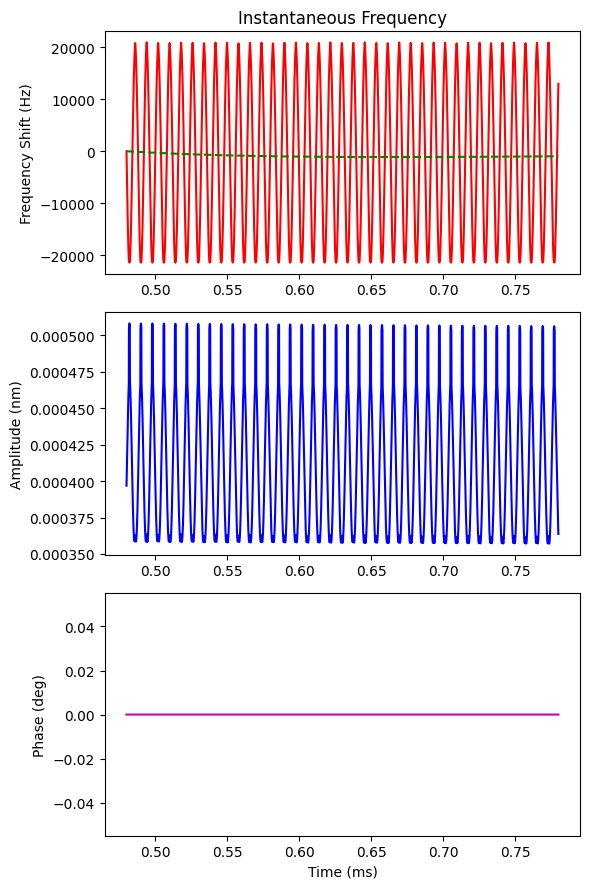

In [120]:
# default : hilbert
data.update_parm(method = 'stft')
data.test(pixel_ind=[10,10])

In [121]:
data.update_parm(filter_amp=True, roi=0.0007, trigger=0.00052, n_taps=1399, method='hilbert')
data.compute()

Creating results datasets


c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\pyUSID\io\hdf_utils\simple.py:1072: UserWarning: In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying
  warn('In the future write_ind_val_dsets will default to requiring dimensions to be arranged from slowest to fastest varying')
c:\Users\pmsda\anaconda3\envs\pycro_env\lib\site-packages\pyUSID\io\hdf_utils\simple.py:1129: UserWarning: pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer createsregion references for each dimension. Please use pyUSID.io.reg_ref.write_region_references to manually create region references
  warn('pyUSID.io.hdf_utils.simple.write_ind_val_dsets no longer creates'


	This class (likely) supports interruption and resuming of computations!
	If you are operating in a python console, press Ctrl+C or Cmd+C to abort
	If you are in a Jupyter notebook, click on "Kernel">>"Interrupt"
	If you are operating on a cluster and your job gets killed, re-run the job to resume

Rank 0 finished parallel computation
Rank 0 - 100% complete. Time remaining: 0.0 msec
Finished processing the entire dataset!


<HDF5 group "/FF_Group/FF_Avg-SVD_000/Rebuilt_Data_000/Rebuilt_Data-Fast_Free_000" (11 members)>

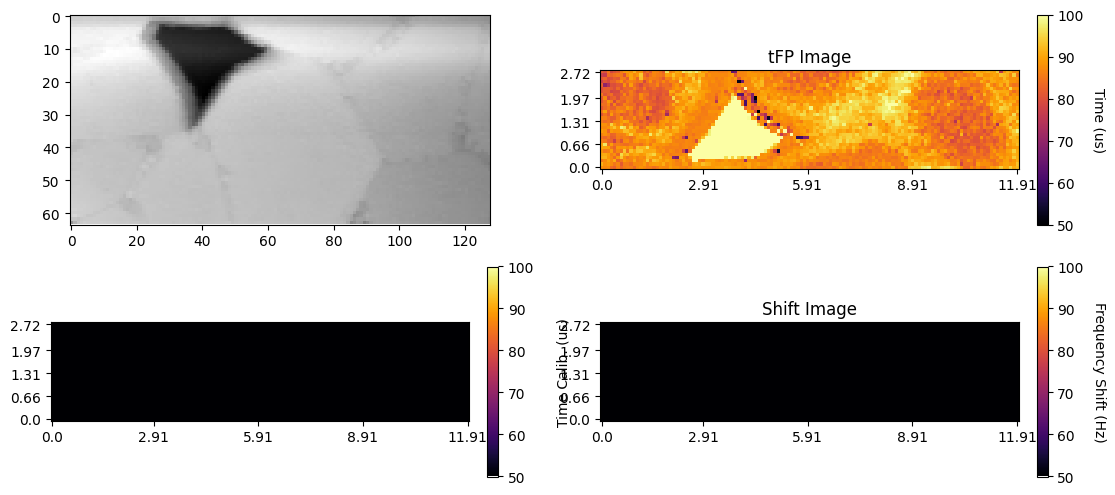

In [162]:
data.reshape()
_, ax = ffta.hdf_utils.process.plot_tfp(data, vmin=50, vmax=100)
ht = h5_avg.file['height_000/Raw_Data'][:, 0].reshape(128, 64).transpose()
img = ax[0][0].imshow(ht*1e9,cmap='gray')

In [163]:
ffta.hdf_utils.process.save_CSV_from_file(data, append='_string_to_identify_data')

Saving from FFtrEFM Class
/FF_Group/FF_Avg-SVD_000/Rebuilt_Data_000/Rebuilt_Data-Fast_Free_000


In [164]:
h5_rb.file.close()